country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.shape

(908, 25)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [7]:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [9]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','estimated_generation_gwh','commissioning_year','country','country_long','name','gppd_idnr','source','url'],  axis = 1, inplace = True)

Dropped all the columns that had NaN values almost close to the number of total number of available values in their respective columns.

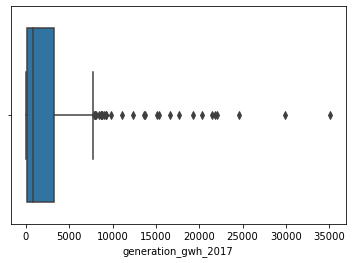

In [10]:
sns.boxplot(x=df['generation_gwh_2017']);

In [11]:
df['latitude'].fillna(df['latitude'].median(), inplace = True)
df['longitude'].fillna(df['longitude'].median(), inplace = True)
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(), inplace = True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(), inplace = True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(), inplace = True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(), inplace = True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(), inplace = True)

As the above columns have outliers and outliers impacts mean a lot, so used median to replace the missing values from those columns.

In [12]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace = True)

geolocation_source is a categorical column, so used mode to replace the missing values.

In [13]:
df.fillna({'generation_data_source':'Central Electricity Authority', 'year_of_capacity_data':2018.0}, inplace=True)

Successfully handeled all the NaNs

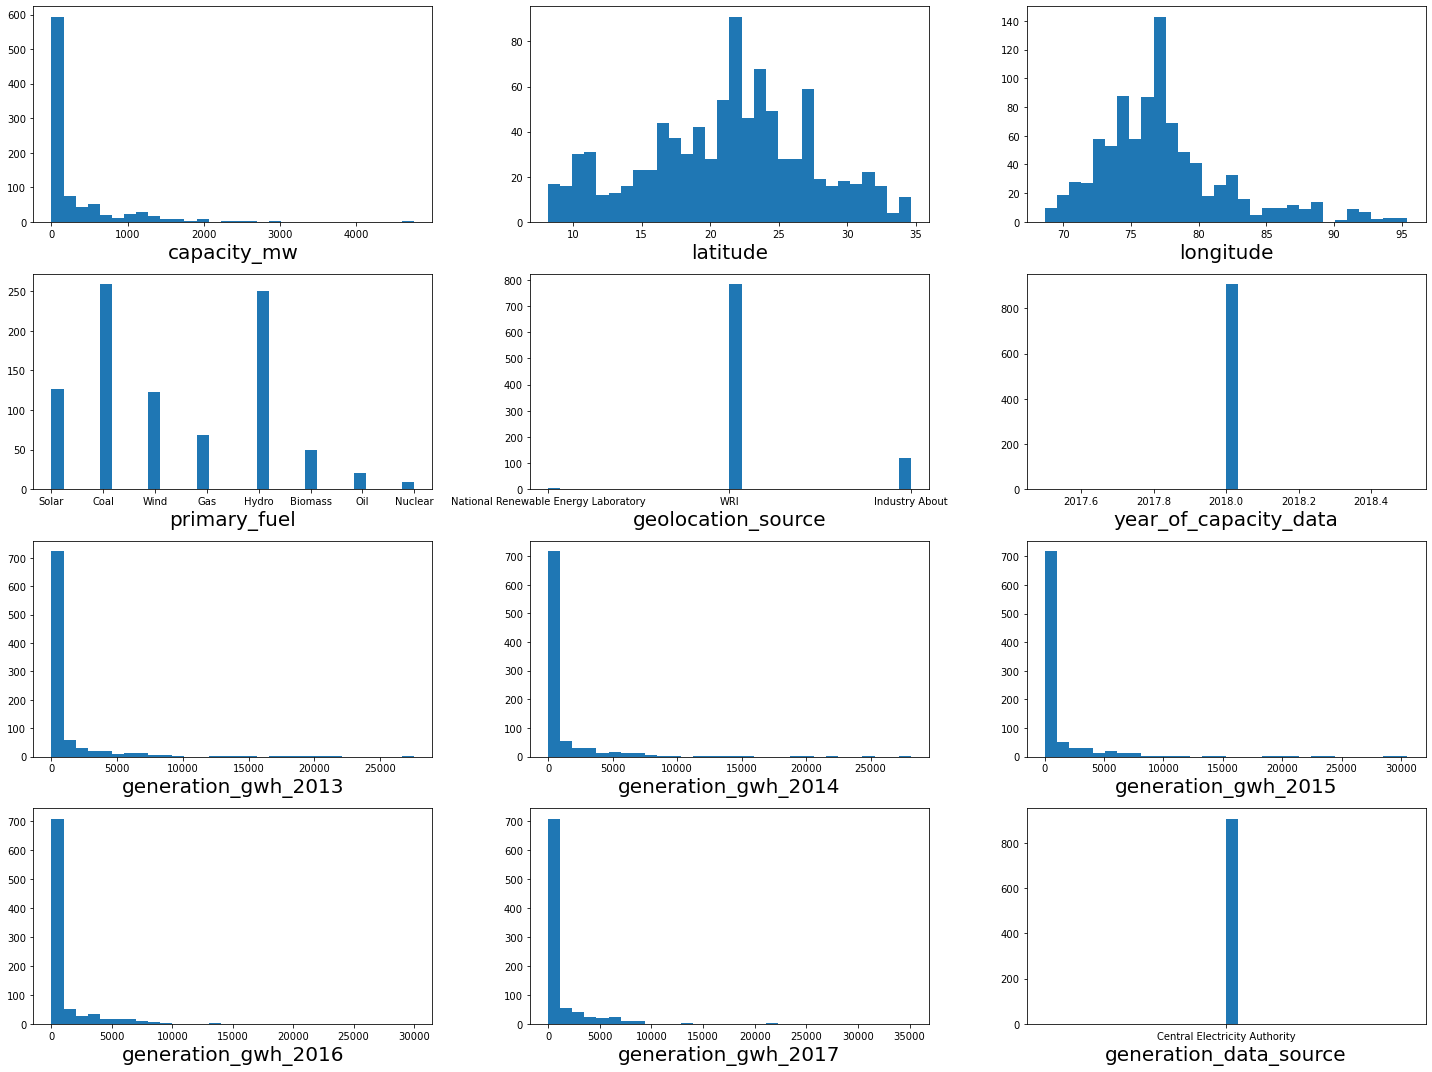

In [14]:
plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
       ax = plt.subplot(4,3, plotnumber)
       plt.hist(df[column], bins=30)
       plt.xlabel(column,fontsize = 20)
       
    plotnumber += 1
    
plt.tight_layout()

Columns - longitude,capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 have outliers that needs to be treated.

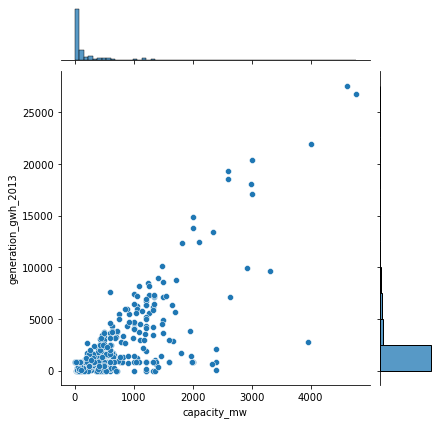

In [15]:
sns.jointplot(x='capacity_mw', y='generation_gwh_2013',data=df)

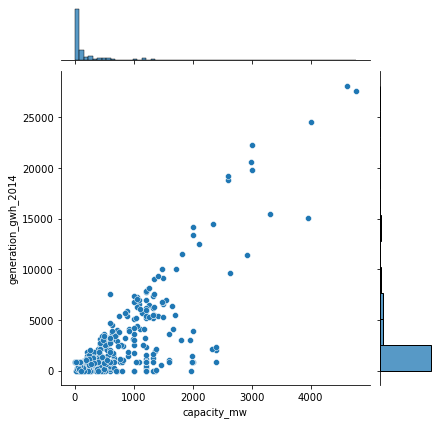

In [16]:
sns.jointplot(x='capacity_mw', y='generation_gwh_2014',data=df)

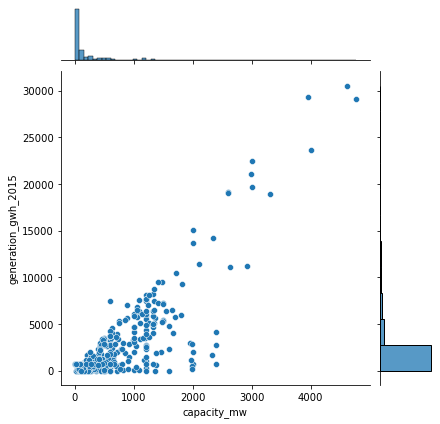

In [17]:
sns.jointplot(x='capacity_mw', y='generation_gwh_2015',data=df)

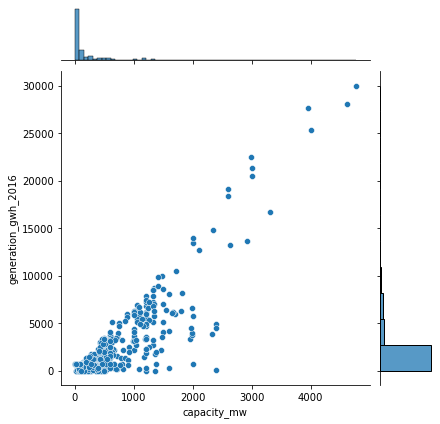

In [18]:
sns.jointplot(x='capacity_mw', y='generation_gwh_2016',data=df)

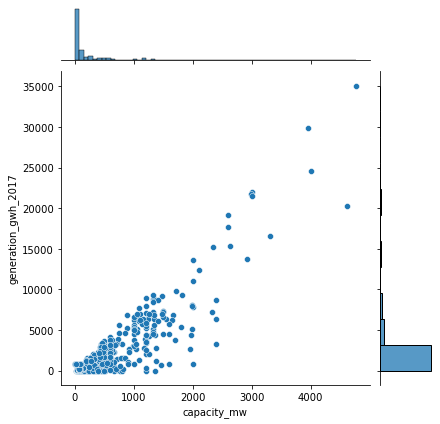

In [19]:
sns.jointplot(x='capacity_mw', y='generation_gwh_2017',data=df)

We can clearly visualise the outliers in the above jointplots and hist plots.

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,908.0,321.046378,580.221767,0.0000,16.837500,60.000000,388.125000,4760.000
latitude,908.0,21.225679,6.089450,8.1689,17.057825,21.778300,25.183775,34.649
longitude,908.0,77.410936,4.783873,68.6447,74.390250,76.719250,79.211600,95.408
year_of_capacity_data,908.0,2018.000000,0.000000,2018.0000,2018.000000,2018.000000,2018.000000,2018.000
generation_gwh_2013,908.0,1434.383254,2575.982982,0.0000,797.063475,797.063475,797.063475,27586.200
generation_gwh_2014,908.0,1518.830440,2783.474774,0.0000,805.760000,805.760000,805.760000,28127.000
generation_gwh_2015,908.0,1502.838018,2985.277178,0.0000,701.027250,701.027250,701.027250,30539.000
generation_gwh_2016,908.0,1552.807503,3006.880849,0.0000,716.728350,716.728350,716.728350,30015.000
generation_gwh_2017,908.0,1648.790766,3047.577626,0.0000,807.601700,807.601700,807.601700,35116.000


In [21]:
df.shape

(908, 12)

In [22]:
from scipy.stats import zscore

In [23]:
z_score = zscore(df[['longitude', 'capacity_mw', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis =1)
df = df[filtering_entry]
df.describe()

,capacity_mw,latitude,longitude,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,866.000000,866.000000,866.000000,866.0,866.000000,866.000000,866.000000,866.000000,866.000000
mean,261.178361,21.130178,76.986239,2018.0,1156.235275,1202.087346,1159.688247,1205.842273,1294.411194
std,413.719327,6.160689,4.201886,0.0,1391.991858,1478.185718,1531.574396,1597.343037,1645.496201
min,0.000000,8.168900,68.644700,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.500000,16.918775,74.313625,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
50%,50.400000,21.778300,76.719250,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,313.750000,25.136350,78.909025,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
max,2000.000000,34.649000,91.565000,2018.0,8965.595000,9335.000000,9453.000000,9887.200000,9271.610000


In [24]:
df.shape

(866, 12)

In [25]:
#Percentage data loss
(908-866)/100

0.42

As the percentage loss is only 0.42, so considered to remove the outliers.

In [26]:
df.skew()

capacity_mw              2.021865
latitude                -0.120533
longitude                0.892126
year_of_capacity_data    0.000000
generation_gwh_2013      3.124673
generation_gwh_2014      2.976604
generation_gwh_2015      2.766274
generation_gwh_2016      2.710642
generation_gwh_2017      2.604487
dtype: float64

In [27]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats

In [28]:
df['capacity_mw'], param = stats.boxcox(df.capacity_mw+1)
df['longitude'], param = stats.boxcox(df.longitude+1)
df['generation_gwh_2013'], param = stats.boxcox(df.generation_gwh_2013+1)
df['generation_gwh_2014'], param = stats.boxcox(df.generation_gwh_2014+1)
df['generation_gwh_2015'], param = stats.boxcox(df.generation_gwh_2015+1)
df['generation_gwh_2016'], param = stats.boxcox(df.generation_gwh_2016+1)
df['generation_gwh_2017'], param = stats.boxcox(df.generation_gwh_2017+1)

In [29]:
df.skew()

capacity_mw              0.015534
latitude                -0.120533
longitude                0.000000
year_of_capacity_data    0.000000
generation_gwh_2013      0.274276
generation_gwh_2014      0.230129
generation_gwh_2015      0.165323
generation_gwh_2016      0.151625
generation_gwh_2017      0.128050
dtype: float64

Removed skewness from all non-categorical columns.

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.primary_fuel = le.fit_transform(df.primary_fuel)
df.geolocation_source = le.fit_transform(df.geolocation_source)
df.generation_data_source = le.fit_transform(df.generation_data_source)

In [31]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,1.232045,28.1839,0.232929,6,1,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
1,4.324441,24.7663,0.232929,1,2,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
2,3.517571,21.9038,0.232929,7,2,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
3,4.604128,23.8712,0.232929,2,2,2018.0,18.919952,19.306627,18.835503,18.879379,18.630634,0
4,6.793643,21.9603,0.232929,1,2,2018.0,26.181181,32.972615,34.177969,34.105614,36.468032,0


In [32]:
y = df['capacity_mw']
X = df.drop(columns = ['capacity_mw'])

In [33]:
corr_matrix = df.corr()
corr_matrix["capacity_mw"].sort_values(ascending=False)

capacity_mw               1.000000
geolocation_source        0.472044
generation_gwh_2016       0.354912
longitude                 0.340313
generation_gwh_2017       0.333752
generation_gwh_2015       0.327760
generation_gwh_2014       0.306462
generation_gwh_2013       0.298831
latitude                  0.054932
primary_fuel             -0.519129
year_of_capacity_data          NaN
generation_data_source         NaN
Name: capacity_mw, dtype: float64

In [34]:
y.value_counts()

1.749580    38
2.322753    22
5.881906    21
2.672459    19
6.460145    19
0.686773    18
2.924077    18
3.281277    16
5.728122    14
3.732499    14
4.342127    13
3.893321    11
5.293593    11
3.084446    11
3.120418    11
6.309039    10
4.501469     9
2.728713     9
1.360954     8
2.479099     8
2.233240     8
4.249824     8
3.442328     8
3.739532     7
5.102131     7
3.535421     7
5.137230     7
2.364424     7
1.896228     7
6.538854     6
1.575351     6
4.089751     6
1.082657     6
2.966939     6
2.755578     6
4.695765     6
3.007845     5
5.203313     5
2.831683     5
5.619884     5
3.417438     5
3.027619     5
6.349545     4
6.551255     4
6.644117     4
4.146461     4
5.375071     4
4.537075     4
4.604128     4
3.639469     4
5.793122     4
3.137875     4
5.922941     4
4.987096     4
5.657560     3
1.526181     3
6.372910     3
4.333329     3
3.338273     3
4.306383     3
5.538964     3
6.500461     3
5.962020     3
6.697128     3
1.974218     3
3.578526     3
3.220374  

In [44]:
from sklearn.metrics import r2_score

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
from sklearn.linear_model import LinearRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = r2_score(y_test,predrf)
    if acc>maxAccu:
       maxAccu=acc
       maxRS = i
print ("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.5783911836837329 on Random_state 24


In [48]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = maxRS)
y_train.head()

774    1.360954
30     2.915253
509    1.360954
473    6.309039
415    6.879727
Name: capacity_mw, dtype: float64

In [49]:
log_reg = LinearRegression()

log_reg.fit(x_train,y_train)

LinearRegression()

In [50]:
y_pred = log_reg.predict(x_test)

In [51]:
print(r2_score(y_test,y_pred))

0.5783911836837329


In [52]:
from sklearn.linear_model import Lasso,LassoCV
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(normalize=True)

In [53]:
alpha = lasscv.alpha_

In [54]:
alpha

0.0003795914613950725

In [55]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0003795914613950725)

In [56]:
lasso_reg.score(x_test,y_test)

0.5782556305740931

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [58]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [59]:
ls = Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.5746615789067426

In [60]:
cv_score=cross_val_score(ls,X,y,cv=5)
cv_mean=cv_score.mean

In [61]:
cv_mean()

0.409115657477545

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'], 'max_features': ["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [63]:
rf= RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = dt.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore =  cross_val_score(rf,X,y,cv=5)
rfc=  rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 score: 84.8174822592188
Cross Val Score: 77.2105860104854


In [65]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(criterion="mse",max_features="log2")
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

dtscore =  cross_val_score(dt,X,y,cv=5)
dtc=  dtscore.mean()
print('Cross Val Score:', dtc*100)

R2 score: 84.8174822592188
Cross Val Score: 60.87801390375495


In [66]:
import pickle
filename = 'Global power plant.pkl'
pickle.dump(rf, open(filename, 'wb'))